# Load and minibatch MNIST data

In [14]:
using Knet, GZip, Statistics, Images

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1186


In [15]:
include(Knet.dir("data","mnist.jl"))
xtrn,ytrn,xtst,ytst = mnist()
summary.((xtrn,ytrn,xtst,ytst))

("28×28×1×60000 Array{Float32,4}", "60000-element Array{UInt8,1}", "28×28×1×10000 Array{Float32,4}", "10000-element Array{UInt8,1}")

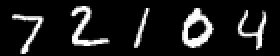

In [16]:
# Here is the first five examples
hcat([mnistview(xtst,i) for i=1:5]...)

In [17]:
# Here is the first five labels
ytst[1:5]'

1×5 LinearAlgebra.Adjoint{UInt8,Array{UInt8,1}}:
 0x07  0x02  0x01  0x0a  0x04

In [18]:
# Minibatch data
Atype = gpu() >= 0 ? KnetArray{Float32} : Array{Float32}
dtst = minibatch(xtst,ytst,100;xtype=Atype) # [ (x1,y1), (x2,y2), ... ] where xi,yi are minibatches of 100
dtrn = minibatch(xtrn,ytrn,100;xtype=Atype) # [ (x1,y1), (x2,y2), ... ] where xi,yi are minibatches of 100
length.((dtrn,dtst))

(600, 100)

In [19]:
# Here is the first minibatch
summary.(first(dtst))  # (x,y) pair where x: 4-D Float32 array with X,Y,C,N  y: 1-D integer array

("28×28×1×100 Array{Float32,4}", "100-element Array{UInt8,1}")

In [20]:
# Loss functions
#zeroone(w,data,model) = 1 - accuracy(w,data,model)
#softmax(w,data,model) = mean(softmax(w,x,y,model) for (x,y) in data)
#softmax(w,x,y,model; o...) = nll(model(w,x;o...),y)
#softgrad = grad(softmax)

In [21]:
# Train model(w) with SGD and return a list containing w for every epoch
#=
function train(w,data,predict; epochs=100,lr=0.1,o...)
    weights = Any[deepcopy(w)]
    for epoch in 1:epochs
        for (x,y) in data
            g = softgrad(w,x,y,predict;o...)
            update!(w,g,lr=lr)  # w[i] = w[i] - lr * g[i]
        end
        push!(weights,deepcopy(w))
    end
    return weights
end
=#